In [ ]:
# Step 1: Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from google.colab.patches import cv2_imshow  # For displaying images in Colab
from google.colab import files

In [ ]:
# Step 2: Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data for CNN input (adding a channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Step 3: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.8643 - loss: 0.4306 - val_accuracy: 0.9816 - val_loss: 0.0559
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9762 - loss: 0.0795 - val_accuracy: 0.9892 - val_loss: 0.0327
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9844 - loss: 0.0526 - val_accuracy: 0.9887 - val_loss: 0.0324
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.9869 - loss: 0.0458 - val_accuracy: 0.9915 - val_loss: 0.0252
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.9892 - loss: 0.0368 - val_accuracy: 0.9917 - val_loss: 0.0287


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9895 - loss: 0.0361

Test Accuracy: 99.17%


In [ ]:
model.save('mnist_cnn_model.h5')

In [ ]:
# Step 8: Load the saved model (for later inference)
loaded_model = tf.keras.models.load_model('mnist_cnn_model.h5')

In [ ]:
# Step 9: Function to predict user-uploaded digit image
def predict_digit(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    img = cv2.resize(img, (28, 28))  # Resize to MNIST format
    img = img / 255.0  # Normalize
    img = img.reshape(1, 28, 28, 1)  # Reshape for model input

    prediction = loaded_model.predict(img)
    digit = np.argmax(prediction)

    plt.imshow(cv2.imread(image_path), cmap='gray')
    plt.title(f"Predicted Digit: {digit}")
    plt.axis('off')
    plt.show()
    return digit

Saving Screenshot 2025-02-07 180656.png to Screenshot 2025-02-07 180656.png
Processing file: Screenshot 2025-02-07 180656.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


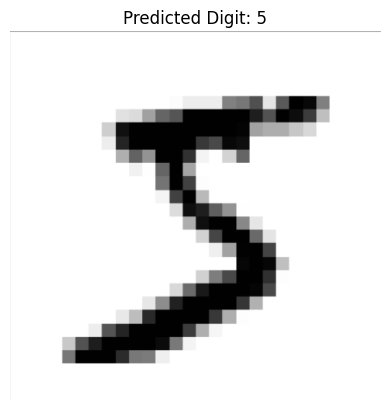

Predicted Digit: 5


In [ ]:
# Step 10: Allow user to upload an image and predict t"he digit
uploaded = files.upload()
for file_name in uploaded.keys():
    print(f"Processing file: {file_name}")
    predicted_digit = predict_digit(file_name)
    print(f"Predicted Digit: {predicted_digit}")